In [1]:
import os
import sys

from moredata.enricher import Enricher
from moredata.enricher.api_connector import ApiConnector
from moredata.models.data import GeopandasData, JsonData
from moredata.parser import parse_document
from moredata.datasets import get_path
import pandas as pd

URL_PATTERN = r'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=c31209c22a41b05b438143e854b57c37'
PARAMETERS = {
  "fields": [
    {
      "key": "lat",
      "name": "latitude",
    }, 
    {
      "key": "lon",
      "name": "longitude",
    }
  ]
}


/home/thomas/anaconda3/envs/moredata-dev/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.2-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
df = pd.read_csv(get_path("airbnb-berlin-main"))
df = df.loc[(~df['latitude'].isna()) & (~df['longitude'].isna())]
df.iloc[0:100].to_json('../osm/data/airbnb-berlin.json', orient='records')

In [2]:
#Desempenho
import time
import psutil
inicio = time.time()
psutil.cpu_percent()
inicio_mem = psutil.virtual_memory()
###########

def response_parser(response):
    return response['main']

sp = JsonData(data_file='../osm/data/1k_preprocessed_events_dates_sp_sample.json', parser=parse_document)

api_weather_enricher = Enricher(connector=ApiConnector(response_parser=response_parser, url_pattern=URL_PATTERN, params=PARAMETERS))

json_enriched = api_weather_enricher.enrich(sp)

import moredata.utils as util
util.write_json_generator_to_json("./data/1k_datapreprocessed_events_dates_sp_sample", json_enriched, 100000)

#Desempenho
cpu_usage = psutil.cpu_percent()
fim = time.time()
final_mem =psutil.virtual_memory()
print(f'Tempo de execucao: {fim - inicio}')
print(f'% de uso de cpu: {cpu_usage}')
print(f'Quantidade de memoria inicial: {inicio_mem.used >> 20} MB')
print(f'Quantidade de memoria final: {final_mem.used >> 20} MB')
print(f'Uso aproximado de memoria {final_mem.used - inicio_mem.used >> 20} MB')

Tempo de execucao: 767.6163918972015
% de uso de cpu: 23.4
Quantidade de memoria inicial: 2134 MB
Quantidade de memoria final: 2106 MB
Uso aproximado de memoria -29 MB


In [2]:
#GEOPANDAS

#Desempenho
import time
import psutil
inicio = time.time()
psutil.cpu_percent()
inicio_mem = psutil.virtual_memory()
###########

def response_parser(response):
    return response['main']

gdf = pd.read_csv("../data/preprocessed_events_dates_sp_sample.csv")

gdf = gdf.loc[(~gdf['latitude'].isna()) & (~gdf['longitude'].isna())]

sp = GeopandasData().from_geodataframe(gdf.iloc[0:5])

api_weather_enricher = Enricher(connector=ApiConnector(response_parser=response_parser, url_pattern=URL_PATTERN, params=PARAMETERS))

geopandas_enriched = api_weather_enricher.enrich(sp)

#Desempenho
cpu_usage = psutil.cpu_percent()
fim = time.time()
final_mem =psutil.virtual_memory()

print(f'Tempo de execucao: {fim - inicio}')
print(f'% de uso de cpu: {cpu_usage}')
print(f'Quantidade de memoria inicial: {inicio_mem.used >> 20} MB')
print(f'Quantidade de memoria final: {final_mem.used >> 20} MB')
print(f'Uso aproximado de memoria {final_mem.used - inicio_mem.used >> 20} MB')

GEOPANDAS DATA
FIELD KEY lat
FILED NAME latitude
ROW FILED NAME -23.66844
-23.66844
FIELD KEY lon
FILED NAME longitude
ROW FILED NAME -46.68029
-46.68029
SELF REPONSE PARSER: {'temp': 298.52, 'feels_like': 298.18, 'temp_min': 296.36, 'temp_max': 299.33, 'pressure': 1022, 'humidity': 41}


ValueError: Incompatible indexer with Series

In [3]:
geopandas_enriched

,h3_hash,app_user_id,date_time,cod_municipio,latitude,longitude
0,8aa810008bb7fff,56961170,2021-12-05T11:56:38.000-03:00,3550308,-23.66844,-46.68029
1,8aa810011737fff,65572294,2021-12-05T16:26:21.000-03:00,3513801,-23.68624,-46.58632
2,8aa81001c227fff,71044967,2021-12-04T13:28:25.000-03:00,3513801,-23.67265,-46.61749
3,8aa8100825b7fff,63526401,2021-12-05T10:18:08.000-03:00,3550308,-23.63283,-46.44711
4,8aa8100912dffff,63796451,2021-12-05T14:35:11.000-03:00,3550308,-23.61167,-46.44392
5,8aa8100b309ffff,60286966,2021-12-04T18:55:01.000-03:00,3529401,-23.66208,-46.43639
6,8aa8100cb987fff,56004509,2021-12-04T20:08:13.000-03:00,3550308,-23.50183,-46.67009
7,8aa810316547fff,61867937,2021-12-04T21:02:53.000-03:00,3510609,-23.54982,-46.83706
8,8aa81077055ffff,70286220,2021-12-05T14:15:13.000-03:00,3550308,-23.45298,-46.57603
9,8aa8100d2667fff,64106692,2021-12-05T13:47:26.000-03:00,3550308,-23.53338,-46.54311


In [9]:
import pandas as pd
df_enriched = pd.read_json('./data/1k_datapreprocessed_events_dates_sp_sample-0.json', orient='records')

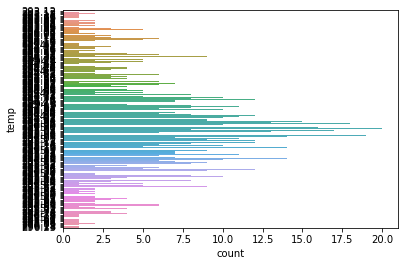

In [19]:
import seaborn
import matplotlib.pyplot as plt
seaborn.countplot(y='temp', data=df_enriched)
plt.show()